In [1]:
#Import all the needed package for EDA and Model building
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tabulate


In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

In [3]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
telphone_data = pd.read_csv('telecom_churn_data.csv')
telphone_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telphone_data.shape

(99999, 226)

In [5]:
telphone_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
telphone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### Categorizing Columns by Data Type  

To efficiently manage and analyze the dataset, we categorize the columns into different types based on their nature.

#### Column Groups:
1. **ID Columns** (`id_cols`): Unique identifiers for each record.
2. **Date Columns** (`date_cols`): Columns representing various date-related information.
3. **Categorical Columns** (`cat_cols`): Columns representing categorical data (e.g., binary indicators).
4. **Numerical Columns** (`num_cols`): All remaining columns that do not belong to the above categories.


In [7]:
# Creating column name lists based on data types
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
             'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
             'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
            'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

# Extracting numerical columns by excluding ID, Date, and Categorical columns
num_cols = [column for column in telphone_data.columns if column not in id_cols + date_cols + cat_cols]


In [8]:
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8


In [9]:
round((telphone_data.isnull().sum()/len(telphone_data.index))*100,2).sort_values(ascending=False).head(50)


date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
max_rech_data_6             74.85
count_rech_2g_6             74.85
av_rech_amt_data_6          74.85
count_rech_3g_6             74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
fb_user_6                   74.85
night_pck_user_6            74.85
arpu_3g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
total_rech_data_7           74.43
arpu_2g_7                   74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
fb_user_7                   74.43
night_pck_user_7            74.43
arpu_2g_9                   74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
av_rech_amt_da

#### Handling Missing Values in Mobile Internet Recharge Data  

Approximately **74-75%** of values are missing for the following attributes:  
- **Average recharge amount** (`av_rech_amt_data_*`)  
- **Max recharge data** (`max_rech_data_*`)  
- **Total recharge data** (`total_rech_data_*`)  
- **Date of last data recharge** (`date_of_last_rech_data_*`)  

Given the high percentage of missing values, we need to assess their impact and decide whether to **impute or drop** these columns for further analysis.








In [10]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telphone_data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


#### Observing Different Sets of Recharge Values  

From the above analysis, we identify three distinct sets of values related to mobile data recharges:

1. **Total Recharge Amount**  
2. **Maximum Recharge Amount**  
3. **Average Recharge Amount for Data**  
4. **Total Recharge for Data**  
5. **Maximum Recharge for Data**  

These variables provide insights into customer recharge behavior, which can help in further analysis and feature selection.


In [11]:
telphone_data.loc[telphone_data.total_rech_data_7.isnull() & telphone_data.date_of_last_rech_data_7.isnull(),\
          ["total_rech_data_7", "date_of_last_rech_data_7"]].head(10)

,total_rech_data_7,date_of_last_rech_data_7
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN
13,NaN,NaN


In [12]:
# Checking if there are instances where 'total_rech_data' is missing but 'av_rech_amt_data' has a value, and vice versa

# Identifying missing values for 'av_rech_amt_data' in different months
missing_av_rech_6 = telphone_data['av_rech_amt_data_6'].isna()
missing_av_rech_7 = telphone_data['av_rech_amt_data_7'].isna()
missing_av_rech_8 = telphone_data['av_rech_amt_data_8'].isna()

# Checking if corresponding 'total_rech_data' values exist for these missing entries
print(telphone_data.loc[missing_av_rech_6, 'total_rech_data_6'].sum())
print(telphone_data.loc[missing_av_rech_7, 'total_rech_data_7'].sum())
print(telphone_data.loc[missing_av_rech_8, 'total_rech_data_8'].sum())

# Identifying missing values for 'total_rech_data' in different months
missing_total_rech_6 = telphone_data['total_rech_data_6'].isna()
missing_total_rech_7 = telphone_data['total_rech_data_7'].isna()
missing_total_rech_8 = telphone_data['total_rech_data_8'].isna()

# Checking if corresponding 'av_rech_amt_data' values exist for these missing entries
print(telphone_data.loc[missing_total_rech_6, 'av_rech_amt_data_6'].sum())
print(telphone_data.loc[missing_total_rech_7, 'av_rech_amt_data_7'].sum())
print(telphone_data.loc[missing_total_rech_8, 'av_rech_amt_data_8'].sum())


0.0
0.0
0.0
0.0
0.0
0.0


#### Handling Missing Values in Recharge Columns  

From the above analysis, we observe that the values are **consistent** with each other.  
Additionally, since the **minimum recharge value is 1**, we can confidently impute missing values with **0**, indicating that no recharge was performed by the customer.  


In [13]:
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
telphone_data[zero_impute_rch] = telphone_data[zero_impute_rch].apply(lambda x: x.fillna(0))

In [14]:
print(telphone_data[zero_impute_rch].isnull().sum()*100/telphone_data.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [15]:
#check unique values
telphone_data.nunique().sort_values(ascending=False)

mobile_number       99999
arpu_6              85681
arpu_7              85308
arpu_8              83615
arpu_9              79937
                    ...  
loc_og_t2o_mou          1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
std_ic_t2o_mou_7        1
Length: 226, dtype: int64

#### Dropping Unnecessary Columns & Handling Missing Values in Categorical Columns  

#### Dropping Irrelevant Columns  
Removing columns that are not needed for further analysis.

#### Handling Missing Values in Categorical Columns  
For categorical variables, missing values will be replaced with **"-1"** to indicate the absence of information.


In [16]:
telphone_data = telphone_data.drop(id_cols + date_cols, axis=1)
telphone_data.shape

(99999, 212)

In [17]:
telphone_data[cat_cols] = telphone_data[cat_cols].apply(lambda x: x.fillna(-1))

In [18]:
print("Missing value ratio:\n")
print(telphone_data[cat_cols].isnull().sum()*100/telphone_data.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


#### Dropping Variables with High Missing Values  

To maintain data quality, we remove columns where the percentage of missing values exceeds a predefined threshold.  
This helps in **reducing noise** and ensures we only retain meaningful data for analysis.

In [19]:
initial_cols = telphone_data.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(telphone_data.apply(lambda column: True if column.isnull().sum()/telphone_data.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':telphone_data.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
207,aon,True
208,aug_vbc_3g,True
209,jul_vbc_3g,True
210,jun_vbc_3g,True


In [20]:
telphone_data = telphone_data.loc[:, include_cols]

dropped_cols = telphone_data.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [21]:
telphone_data[telphone_data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = telphone_data[telphone_data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

### Filtering High-Value Customers  

To identify **high-value customers**, we analyze their recharge patterns.  
This involves observing key **recharge-related columns** to assess spending behavior.



In [22]:
rch_telphone_data=telphone_data.columns[telphone_data.columns.str.contains('rech_amt|rech_data')]
rch_telphone_data

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [23]:
100*telphone_data.loc[:,rch_telphone_data].isnull().sum()/len(telphone_data)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [24]:
telphone_data.loc[:,rch_telphone_data].head(10)

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0
1,74.0,384.0,283.0,121.0,44.0,154.0,65.0,50.0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,154.0,50.0,0.0
2,168.0,315.0,116.0,358.0,86.0,200.0,86.0,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,46.0
3,230.0,310.0,601.0,410.0,60.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,196.0,350.0,287.0,200.0,56.0,110.0,110.0,50.0,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
5,120.0,0.0,130.0,130.0,120.0,0.0,130.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,499.0,222.0,294.0,141.0,90.0,37.0,50.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,437.0,601.0,120.0,186.0,90.0,154.0,30.0,36.0,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,177.0,69.0,0.0
9,220.0,195.0,210.0,180.0,110.0,154.0,50.0,130.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,154.0,0.0,0.0


Investigating Values for June  

To gain insights into customer behavior, we focus on analyzing data for **June**.  
This includes evaluating key metrics such as recharge amounts, data usage, and call activity.  

By examining **June-specific trends**, we can identify patterns that may influence customer retention and churn.

In [25]:
rch_telphone_data_6=telphone_data.columns[telphone_data.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]
telphone_data.loc[:,rch_telphone_data_6].head(10)

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,362.0,252.0,1.0,252.0,252.0
1,74.0,44.0,0.0,0.0,0.0
2,168.0,86.0,0.0,0.0,0.0
3,230.0,60.0,0.0,0.0,0.0
4,196.0,56.0,1.0,56.0,56.0
5,120.0,120.0,0.0,0.0,0.0
6,499.0,90.0,0.0,0.0,0.0
7,1580.0,1580.0,0.0,0.0,0.0
8,437.0,90.0,0.0,0.0,0.0
9,220.0,110.0,0.0,0.0,0.0


In [26]:
100*telphone_data.loc[:,rch_telphone_data].isnull().sum()/len(telphone_data)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

Verifying Null Value Indices for Both Columns  

We check whether the indices of missing values in **`total_rech_data`** and **`av_rech_amt_data`** match.  

Interpretation:
- If the result is **True**, it means both columns have null values at the same rows.  
- If the result is **False**, it indicates that missing values in these columns do not align perfectly.  

This verification helps in understanding whether imputing missing values should be done **jointly** or **independently**.


In [27]:
res = telphone_data.total_rech_data_6[telphone_data.total_rech_data_6.isna()].index != telphone_data.av_rech_amt_data_6[telphone_data.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = telphone_data.total_rech_data_7[telphone_data.total_rech_data_7.isna()].index != telphone_data.av_rech_amt_data_7[telphone_data.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =telphone_data.total_rech_data_8[telphone_data.total_rech_data_8.isna()].index != telphone_data.av_rech_amt_data_8[telphone_data.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


#### Deriving a New Variable: **Total Recharge Amount for Data**  

From the above test, we confirm that when **`total_rech_data`** is null, **`av_rech_amt_data`** is also null.  
This allows us to create a **new derived variable**: **`total_rech_amt_data`**, which represents the total recharge amount for mobile data.

This derived feature can help in analyzing **customer spending patterns** on data recharges.


In [28]:
telphone_data['total_data_rech_6'] = telphone_data.total_rech_data_6 * telphone_data.av_rech_amt_data_6
telphone_data['total_data_rech_7'] = telphone_data.total_rech_data_7 * telphone_data.av_rech_amt_data_7

In [29]:
any(telphone_data.total_rech_amt_6.isna())

False

In [30]:
any(telphone_data.total_rech_amt_7.isna())

False

In [31]:
telphone_data['amt_data_6'] = telphone_data.total_rech_amt_6 + telphone_data.total_data_rech_6
telphone_data['amt_data_7'] = telphone_data.total_rech_amt_7 + telphone_data.total_data_rech_7

In [32]:
telphone_data['av_amt_data_6_7'] = (telphone_data.amt_data_6 + telphone_data.amt_data_7)/2

In [33]:
telphone_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,...,968.0,30.4,0.0,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,...,1006.0,0.0,0.0,0.00,0.00,0.0,154.0,74.0,538.0,306.0
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,...,1103.0,0.0,0.0,4.17,0.00,0.0,0.0,168.0,315.0,241.5
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,...,2491.0,0.0,0.0,0.00,0.00,0.0,0.0,230.0,310.0,270.0
4,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,...,1526.0,0.0,0.0,0.00,0.00,56.0,0.0,252.0,350.0,301.0


In [34]:
telphone_data[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,306.0,0.0,154.0,74.0,538.0
2,241.5,0.0,0.0,168.0,315.0
3,270.0,0.0,0.0,230.0,310.0
4,301.0,56.0,0.0,252.0,350.0


##### Filtering High-Value Customers  

#### Defining High-Value Customers  
A **high-value customer** is defined as follows:  
- Customers who have recharged with an amount **greater than or equal to X**,  
- Where **X** is the **70th percentile** of the **average recharge amount** during the **first two months** (the good phase).  

This threshold helps in segmenting **top spenders**, ensuring that further analysis focuses on the most valuable customers.

#### Calculating the 70th Percentile Recharge Amount  
We determine **X** by computing the **70th percentile** of recharge amounts for the first two months.


In [35]:
print("The 70th percentile recharge amount is: {:.2f}".format(telphone_data['av_amt_data_6_7'].quantile(0.7)))


The 70th percentile recharge amount is: 478.00


Extracting High-Value Customers  

To identify **high-value customers**, we filter those whose **total average recharge amount** during the **good phase** is **greater than the 70th percentile**.  

This ensures that our analysis focuses on customers with **higher spending patterns**, which can be crucial for retention strategies and churn prediction.


In [36]:
high_val_cust = telphone_data.loc[telphone_data.av_amt_data_6_7 > telphone_data.av_amt_data_6_7.quantile(0.7), :]
high_val_cust = high_val_cust.reset_index(drop=True)
high_val_cust.shape

(29953, 201)

In [37]:
print("Total records before filtering high-value customers: {}".format(len(telphone_data)))
print("Total records after filtering high-value customers: {}".format(len(high_val_cust)))


Total records before filtering high-value customers: 99999
Total records after filtering high-value customers: 29953


In [38]:
# delete variables created to filter high-value customers
high_val_cust = high_val_cust.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
high_val_cust.shape

(29953, 196)

In [39]:
high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Columns: 196 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(196)
memory usage: 44.8 MB


#### Churn Derivation  

To determine **customer churn**, we analyze key usage metrics, including:  

- **Total Incoming & Outgoing Minutes of Usage (MOU)**  
- **2G & 3G Data Consumption**  

These factors help in identifying customers who have **stopped using** their mobile services, leading to churn classification.


In [40]:
high_val_cust['total_calls_mou_9'] = high_val_cust.total_ic_mou_9 + high_val_cust.total_og_mou_9

In [41]:
high_val_cust['total_internet_mb_9'] =  high_val_cust.vol_2g_mb_9 + high_val_cust.vol_3g_mb_9

#### Tagging Churners and Removing Churn Phase Attributes  

#### Defining Churned Customers  
We classify a customer as **churned (`churn=1`)** if, during the **churn phase (Month 9)**, they:  
- **Did not make any calls** (neither incoming nor outgoing)  
- **Did not use mobile internet** (neither 2G nor 3G data)  

#### Attributes Used for Churn Tagging:  
To identify churners, we use the following attributes for Month 9:  
- **`total_ic_mou_9`** → Total incoming minutes of usage  
- **`total_og_mou_9`** → Total outgoing minutes of usage  
- **`vol_2g_mb_9`** → Data usage in MB (2G)  
- **`vol_3g_mb_9`** → Data usage in MB (3G)  

Once churners are tagged, we remove **churn-phase attributes** to prevent data leakage in model training.


In [42]:
high_val_cust['churn'] = high_val_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [43]:
high_val_cust[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
1,1,0.00,0.00,0.00,0.00
2,0,34.91,142.18,0.00,0.00
3,0,252.61,1031.53,0.00,0.00
4,0,127.48,127.63,13.93,314.74
...,...,...,...,...,...
29948,0,391.63,64.21,0.00,0.00
29949,0,149.26,14.44,723.41,232.56
29950,0,547.11,1095.24,9.14,941.48
29951,0,265.84,182.16,0.05,393.34


#### Removing Churn Phase Attributes  

#### Steps:  
1. **Define the target variable (`y`)** by tagging churners.  
2. **Remove all attributes related to the churn phase**, i.e., columns **ending with `_9`**.  
3. **Retrieve a list of columns** that have names ending with `_9` for removal.  

This ensures that **only data from the good phase** is used for model training, preventing data leakage.


In [44]:
month_9_cols = high_val_cust.columns[high_val_cust.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
month_9_cols

The columns names ends with _9 are given below...


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9', 'total_calls_mou_9', 'total_internet_mb_9'],
      dtype='object')

In [45]:
high_val_cust = high_val_cust.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [46]:
high_val_cust.churn = high_val_cust.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(high_val_cust.churn.value_counts()*100/high_val_cust.shape[0])

Churn Ratio:
churn
0    91.877274
1     8.122726
Name: count, dtype: float64


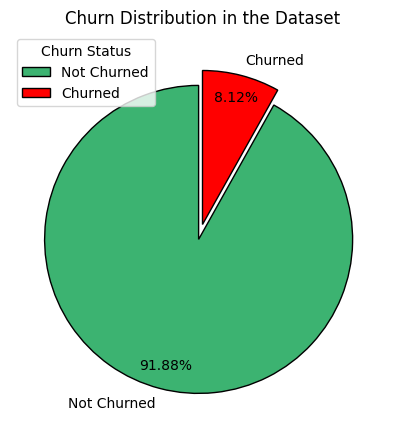

In [47]:
churn_percentage = (high_val_cust['churn'].value_counts() / len(high_val_cust)) * 100

explode_values = (0.1, 0.0)  
colors = ["mediumseagreen", "red"]  
labels = ['Not Churned', 'Churned']  

# Plotting the pie chart
plt.figure(figsize=(12, 5))
churn_percentage.plot(
    kind="pie", 
    autopct='%1.2f%%', 
    labels=labels, 
    explode=explode_values, 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}, 
    pctdistance=0.85,
    colors=colors  
)

plt.legend(title="Churn Status", loc='best')
plt.title("Churn Distribution in the Dataset")
plt.ylabel('')  
plt.show()

Approximately 8.1% of high-value customers have churned.
Calculate the difference variable as the difference between the 8th month's value and the average of the 6th and 7th months.

In [48]:
# List of column base names to compute differences for
cols = [
    "arpu", "onnet_mou", "offnet_mou", "roam_ic_mou", "roam_og_mou",
    "loc_og_mou", "std_og_mou", "isd_og_mou", "spl_og_mou", "total_og_mou",
    "loc_ic_mou", "std_ic_mou", "isd_ic_mou", "spl_ic_mou", "total_ic_mou",
    "total_rech_num", "total_rech_amt", "max_rech_amt",
    "total_rech_data", "max_rech_data", "av_rech_amt_data",
    "vol_2g_mb", "vol_3g_mb"
]

# Loop over each column base name and create the new difference column
for col in cols:
    # Calculate the average of months 6 and 7 for the current column
    avg_67 = high_val_cust[[f"{col}_6", f"{col}_7"]].mean(axis=1)
    # Compute the difference with month 8 and store in a new column with suffix '_diff'
    high_val_cust[f"{col}_diff"] = high_val_cust[f"{col}_8"] - avg_67


In [49]:
high_val_cust['total_og_mou_diff'].describe()

count    29953.000000
mean       -67.461292
std        502.520398
min      -7213.410000
25%       -167.865000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [50]:
col_9 =  high_val_cust.columns[high_val_cust.columns.str.contains('_9')]

In [51]:
#  all names ending with 9
col_9 = high_val_cust.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9]
cat_cols.append('churn')
num_cols = [col for col in high_val_cust.columns if col not in cat_cols]



In [52]:
high_val_cust[num_cols] = high_val_cust[num_cols].apply(pd.to_numeric)
high_val_cust[cat_cols] = high_val_cust[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [53]:
#  plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    # Determine data types for both variables
    dt1 = data_type(var1)
    dt2 = data_type(var2)
    
    if dt1 == 'numerical' and dt2 == 'numerical':
        sns.regplot(x=var1, y=var2)
    elif dt1 == 'categorical' and dt2 == 'numerical':
        sns.boxplot(x=var1, y=var2)
    elif dt1 == 'numerical' and dt2 == 'categorical':
        sns.boxplot(x=var2, y=var1)
    else:
        print("Bivariate plot not defined for these data types.")

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


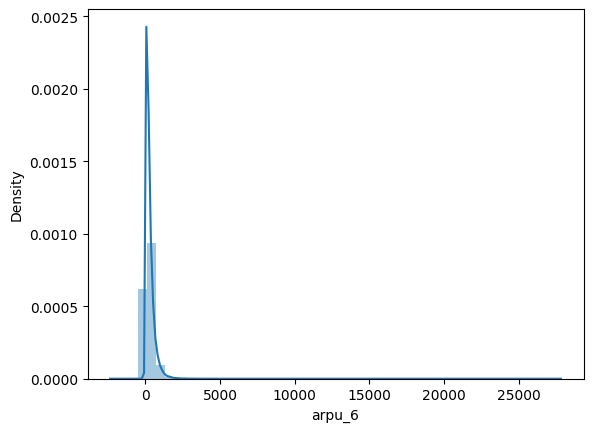

In [54]:
univariate(telphone_data.arpu_6)

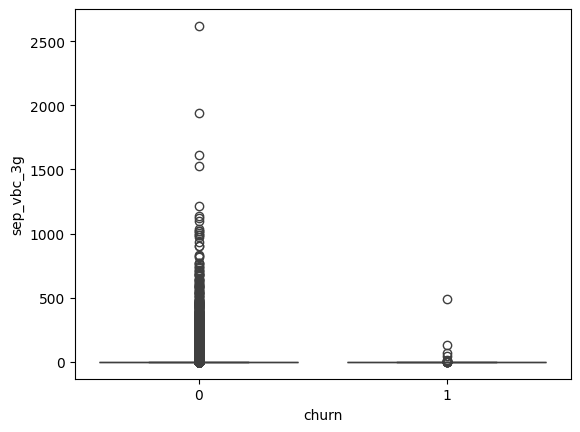

In [55]:
bivariate(high_val_cust.sep_vbc_3g, high_val_cust.churn)

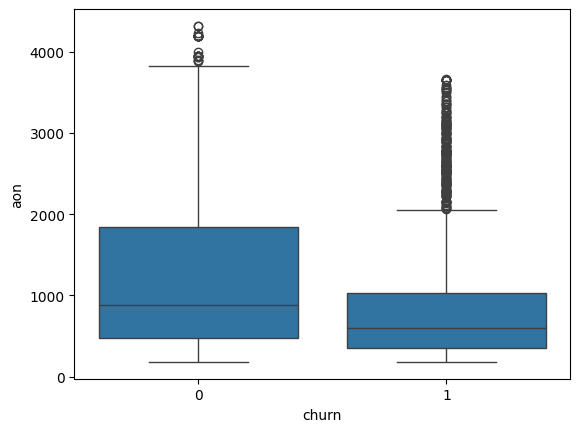

In [56]:
bivariate(high_val_cust.churn, high_val_cust.aon)

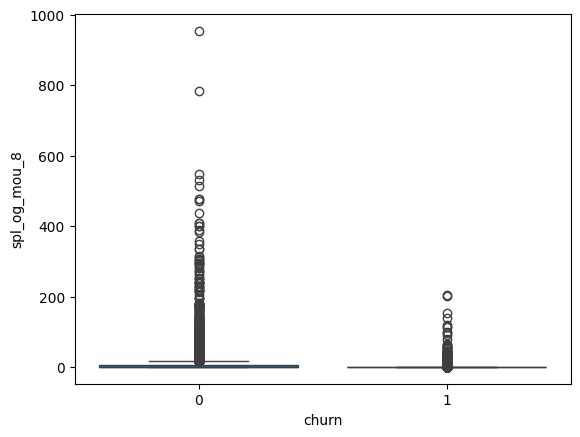

In [57]:
bivariate(high_val_cust.spl_og_mou_8, high_val_cust.churn)

count    99999.000000
mean       175.595457
std        310.968398
min          0.000000
25%         16.030000
50%         74.680000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


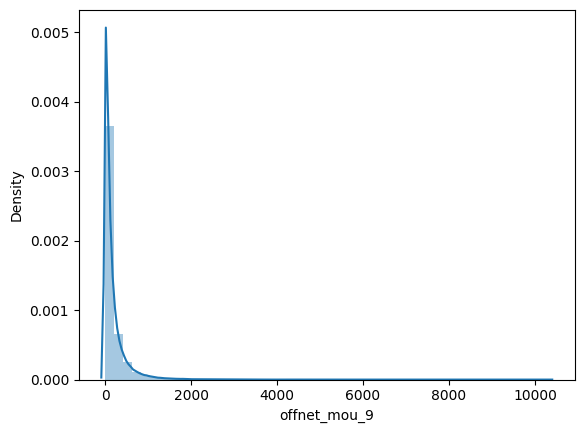

In [58]:
univariate(telphone_data.offnet_mou_9)

count    99999.000000
mean       125.864313
std        302.023240
min          0.000000
25%          4.090000
50%         28.040000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


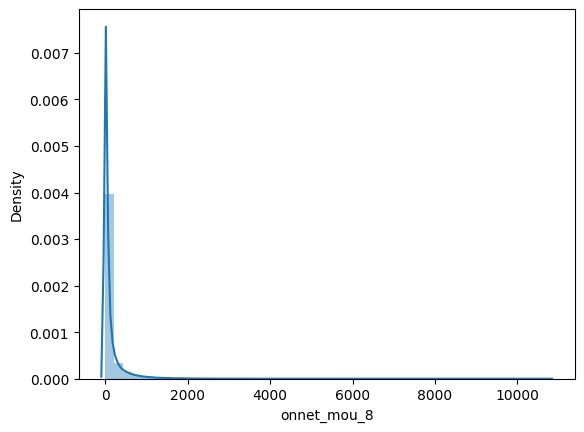

In [59]:
univariate(telphone_data.onnet_mou_8)

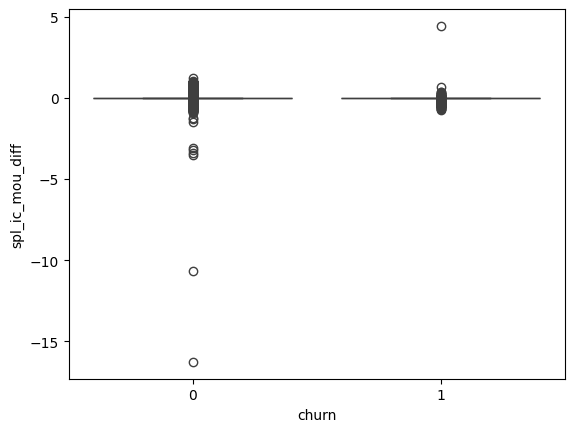

In [60]:
bivariate(high_val_cust.spl_ic_mou_diff, high_val_cust.churn)

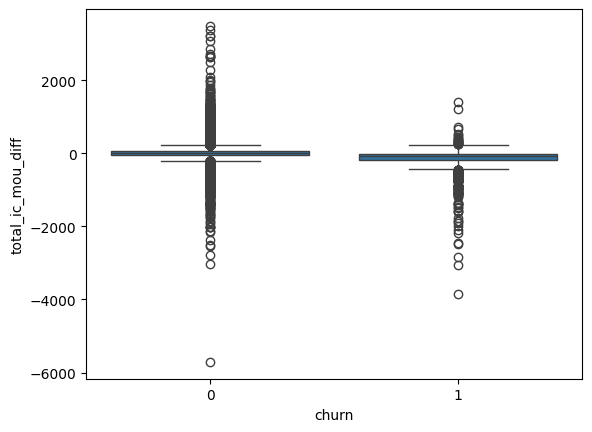

In [61]:
bivariate(high_val_cust.total_ic_mou_diff, high_val_cust.churn)

In [62]:
print('Summary metrics - Numeric Variables')

# Define chunk size for batch processing
chunk_size = 20  
num_cols = high_val_cust.select_dtypes(include=[np.number]).columns  # Get only numeric columns

# Loop through numeric columns in chunks of 20
for i in range(0, len(num_cols), chunk_size):
    print(f"\nSummary for columns {i} to {i + chunk_size - 1}:")
    print(high_val_cust[num_cols[i:i + chunk_size]].describe())

Summary metrics - Numeric Variables

Summary for columns 0 to 19:
       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         29953.0         29953.0         29953.0  29953.000000   
mean              0.0             0.0             0.0    558.820058   
std               0.0             0.0             0.0    460.868223   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    310.142000   
50%               0.0             0.0             0.0    482.354000   
75%               0.0             0.0             0.0    700.240000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     561.160547    508.890301    467.446183    260.900880    268.051744   
std      480.028497    502.136278    501.837624    459.85

## EDA Summary

### Revenue Analysis (3 Columns)
- Some revenue columns contain negative values, indicating possible financial losses caused by certain customers. These columns may contain errors or may not add value to our prediction, so they can be dropped.  
- To ensure consistency, revenue values should be rounded to two decimal places.

### Minutes of Usage (60+ Columns)
- Many usage-related columns have zero values for a majority of customers, with a few outliers.  
- This is especially noticeable in categories such as:
  - Roaming Incoming / Outgoing  
  - ISD Incoming / Outgoing  
  - Special & STD Calls  
  - Customer Care Calls (T2C)  
- Aggregating columns based on **Incoming vs. Outgoing usage** or **call type** could help in analysis.

### Recharge Data (12 Numeric + 3 Date Columns)
- Numeric recharge values should be explicitly converted to integer type.  
- Date columns should be formatted correctly as date-type variables.

### 2G & 3G Data Usage (22 Columns)
- Many data-related columns have a median value of **0**, indicating that a significant number of customers do not use mobile data.
- `vbc_3g` columns should be renamed to reflect the corresponding month.  
- Data values should be standardized and rounded to two decimal places.

### Age on Network (AON)
- The **AON** column represents how long a customer has been using the network.  
- A new feature indicating **total years on the network** can be derived from this.

### Churn (Target Variable)
- The dataset is **highly imbalanced**, with only **6%** of customers identified as churners.  
- This class imbalance should be handled using **resampling techniques** like oversampling or undersampling.

### Handling Missing Values
- Many columns with missing data were removed, but missing values often follow a **pattern**:
  - **Call-only users** tend to have blank data-related fields.  
  - **Data-only users** may have missing call-related fields.  
- Instead of dropping missing values, imputing them with **zero** can help retain useful information.

## Feature Engineering Considerations
- **Customer Tenure**: Derive a feature from AON to represent **years on the network**.
- **User Segmentation**: Classify customers into meaningful groups based on their usage patterns:
  - Both Calls & Data Users  
  - Call-Only Users  
  - Data-Only Users  
  - Incoming Calls Only  
  - Outgoing Calls Only  
- **Recharge & Usage Patterns**: Segment customers based on **recharge amount, spending behavior, and usage trends**.
- **Customer Care Calls (T2C)**: Analyzing **call frequency and duration** could help detect customer dissatisfaction, which is a strong churn indicator.


In [63]:
def feature_churn_stats(feature_prefix):
    # Set plot size
    plt.rcParams["figure.figsize"] = (17, 7)
    
    # Print header and determine column names for months 6, 7, and 8
    print("Churn Statistics (Mean & Standard Deviation):")
    month_cols = {month: f"{feature_prefix}_{month}" for month in [6, 7, 8]}
    print("Analyzing columns:", month_cols)
    
    # Calculate statistics for each churn group (0: Non Churned, 1: Churned)
    stats = []
    for ch in [0, 1]:
        group = high_val_cust[high_val_cust["churn"] == ch]
        stats.append({
            "mean_6": group[month_cols[6]].mean(),
            "mean_7": group[month_cols[7]].mean(),
            "mean_8": group[month_cols[8]].mean(),
            "std_6": group[month_cols[6]].std(),
            "std_7": group[month_cols[7]].std(),
            "std_8": group[month_cols[8]].std()
        })
    
    # Create boxplots for each month
    fig, axes = plt.subplots(1, 3)
    for i, month in enumerate([6, 7, 8]):
        sns.boxplot(x="churn", y=month_cols[month], data=high_val_cust, ax=axes[i],
                    hue="churn", linewidth=2.5, showfliers=False)
    plt.tight_layout()
    
    # Return the stats as a DataFrame, labeling rows by churn status
    return pd.DataFrame(stats, index=["Non Churned", "Churned"]).round(2)


Churn Statistics (Mean & Standard Deviation):
Analyzing columns: {6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,649.97,663.89,613.98,547.95,574.45,615.04
Churned,787.33,627.46,253.69,682.48,668.66,452.97


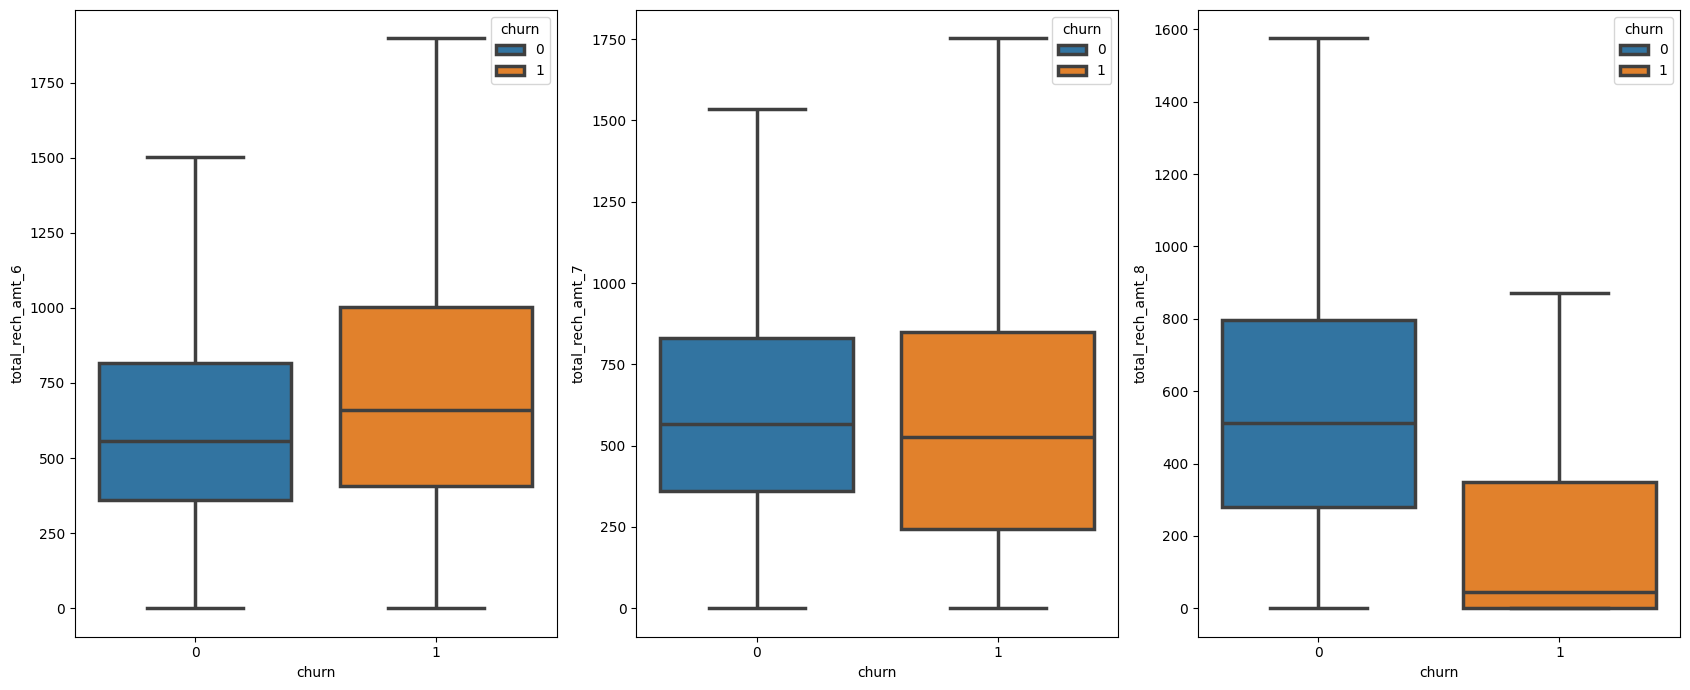

In [64]:
feature_churn_stats('total_rech_amt')

In [65]:
recharge_amnt_columns =  high_val_cust.columns[high_val_cust.columns.str.contains('rech_amt')]

recharge_amnt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'av_rech_amt_data_diff'],
      dtype='object')

Churn Statistics (Mean & Standard Deviation):
Analyzing columns: {6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,169.10,173.40,166.83,172.1,176.85,171.42
Churned,172.18,159.66,85.54,209.4,227.28,176.90


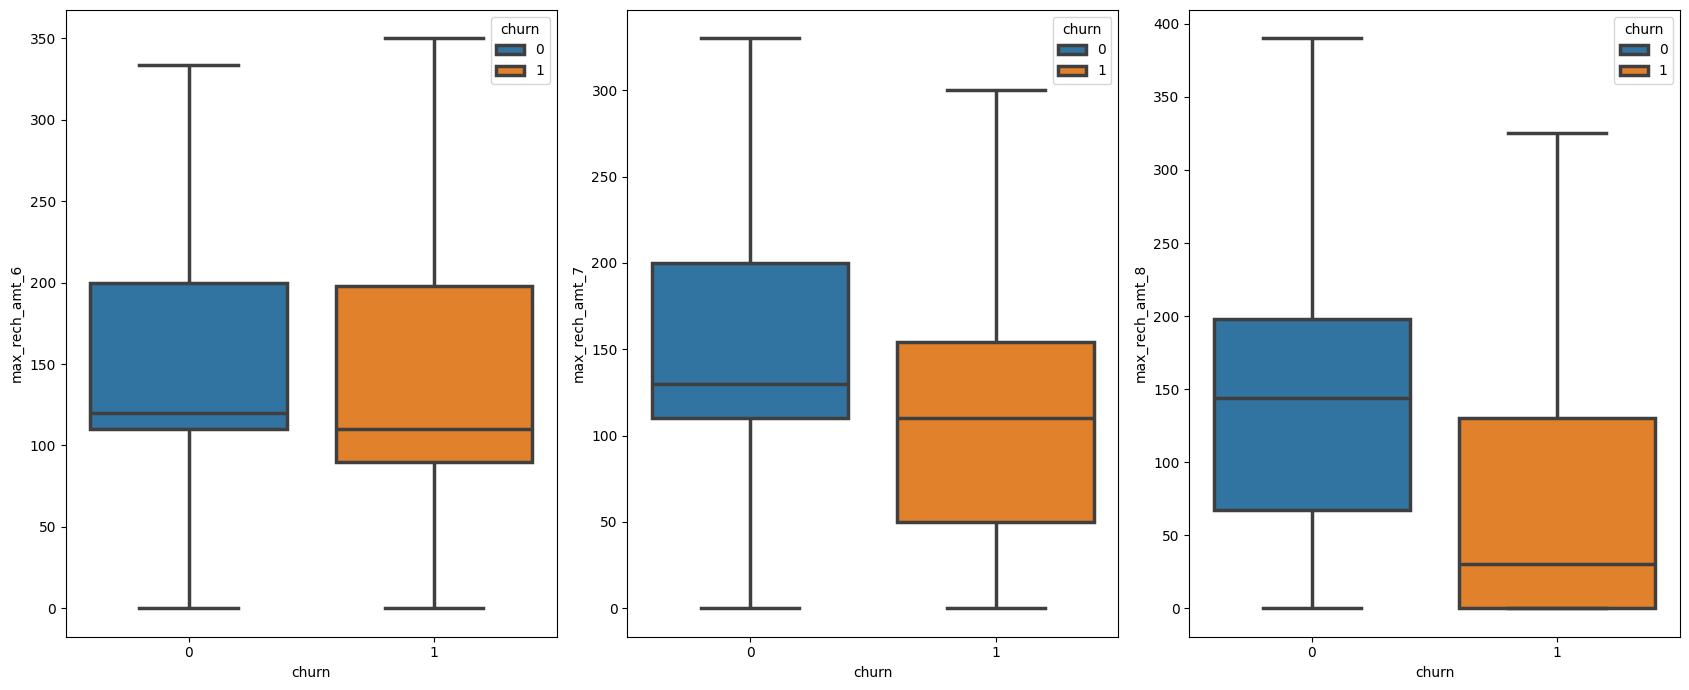

In [66]:
feature_churn_stats('max_rech_amt')

In [67]:
pd.crosstab(high_val_cust.churn, high_val_cust.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.918105,97.114275,97.360704
1,14.081895,2.885725,2.639296


In [68]:
pd.crosstab(high_val_cust.churn, high_val_cust.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,19.0,20.0,21.0,23.0,25.0,27.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,
0,24936,1608,397,183,106,86,43,35,28,19,...,1,3,3,2,1,1,1,2,1,1
1,2361,48,5,8,4,2,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [70]:
high_val_cust[num_cols] = high_val_cust[num_cols].apply(cap_outliers, axis=0)

In [71]:
high_val_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,...,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,0.0,0.0,0.0,548.514161,551.188115,498.725003,457.829622,244.617463,251.474623,216.847412,...,-0.013711,-12.939341,-1.775336,-77.417346,-9.024191,-0.151190,-6.310569,-13.370373,-20.378957,-9.405241
std,0.0,0.0,0.0,356.773582,361.289210,384.542031,381.720503,371.778970,387.930190,354.977569,...,0.117215,172.824139,5.868286,361.358189,101.273135,1.819270,68.289357,126.503797,187.616192,454.108531
min,0.0,0.0,0.0,-823.784610,-878.924945,-945.808000,-1038.066688,0.000000,0.000000,0.000000,...,-0.537432,-679.434403,-22.081196,-1331.865709,-421.513514,-6.785967,-241.610728,-457.948931,-788.613826,-1881.452483
1%,0.0,0.0,0.0,1.272400,0.726000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.380000,-679.434403,-22.081196,-1207.920000,-421.513514,-6.785967,-241.610728,-449.000000,-788.613826,-1727.872000
10%,0.0,0.0,0.0,171.795000,177.973000,84.302800,23.000000,0.710000,0.580000,0.000000,...,-0.130000,-174.505000,-8.000000,-506.000000,-109.500000,-2.000000,-88.500000,-152.000000,-168.475000,-384.172000
25%,0.0,0.0,0.0,310.142000,310.071000,231.615000,189.750000,17.090000,16.040000,10.440000,...,0.000000,-67.220000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-60.000000,-21.155000,-2.395000
50%,0.0,0.0,0.0,482.354000,481.496000,427.604000,388.093000,84.640000,82.830000,65.660000,...,0.000000,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,700.240000,698.829000,661.753000,626.637000,290.490000,290.540000,240.630000,...,0.000000,44.295000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
90%,0.0,0.0,0.0,994.408600,996.170600,977.546400,935.926600,754.560000,784.828000,666.266000,...,0.000000,141.817000,4.500000,301.000000,71.000000,1.500000,50.000000,116.000000,68.267000,312.172000


### Model Building

### Train-Test Split


In [72]:
high_val_cust['churn'] = pd.to_numeric(high_val_cust['churn'])

In [73]:
X = high_val_cust.drop("churn", axis = 1)
y = high_val_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [74]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.141152
 0.0    0.062857
 1.0    0.025074
Name: churn, dtype: float64

In [75]:
y_test.shape

(7489,)

In [76]:
y_train.shape

(22464,)

In [77]:
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [78]:
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 22464 entries, 14197 to 17924
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  22464 non-null  category
 1   night_pck_user_7  22464 non-null  category
 2   night_pck_user_8  22464 non-null  category
 3   fb_user_6         22464 non-null  category
 4   fb_user_7         22464 non-null  category
 5   fb_user_8         22464 non-null  category
dtypes: category(6)
memory usage: 307.9 KB


In [79]:
(high_val_cust.isnull().sum()*100/high_val_cust.shape[0]).sort_values(ascending=False)

loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
arpu_6                   0.0
arpu_7                   0.0
                        ... 
total_rech_data_diff     0.0
max_rech_data_diff       0.0
av_rech_amt_data_diff    0.0
vol_2g_mb_diff           0.0
vol_3g_mb_diff           0.0
Length: 220, dtype: float64

In [80]:
#standard

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [81]:
pca = pca.named_steps['pca']

print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.51
1       21.20
2       27.00
3       31.55
4       35.25
        ...  
214    100.00
215    100.00
216    100.00
217    100.00
218    100.00
Length: 219, dtype: float64


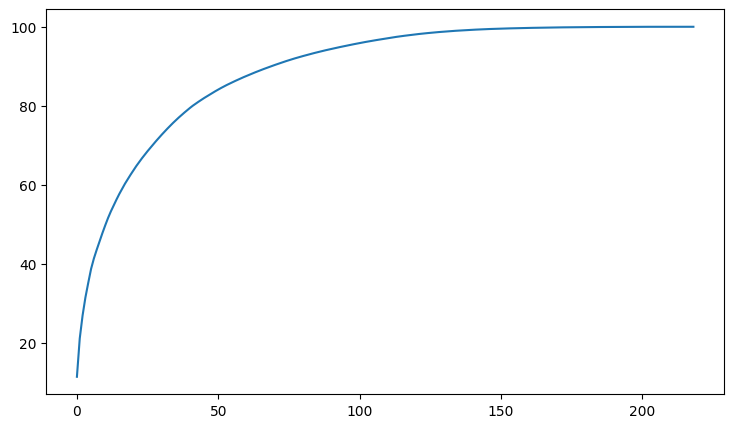

In [82]:
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [83]:
PCA_VARS = 60
steps = [('scaler', StandardScaler()),("pca", PCA(n_components=PCA_VARS)),("logistic", LogisticRegression(class_weight='balanced'))]
pipeline = Pipeline(steps)

In [84]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.9603365384615384

In [85]:
y_pred = pipeline.predict(X_test)

# creating confusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6561  320]
 [   4  604]]
Sensitivity: 	0.99
Specificity: 	0.95
AUC:    	 0.99


### Hyperparameter tuning

In [86]:
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})
steps = [("scaler", StandardScaler()),("pca", PCA()),("logistic", logistic)]
pca_logistic = Pipeline(steps)
param = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.4, 0.5], 'logistic__penalty': ['l1', 'l2']}
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)
model = GridSearchCV(estimator = pca_logistic, cv = fold, param_grid = param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [87]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.4, 0.5],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [88]:
# To display the params in GIT Page to avoid rending issue
cv_results_df = pd.DataFrame(model.cv_results_)
cv_results_df = cv_results_df[['param_logistic__C', 'mean_test_score', 'std_test_score', 'rank_test_score']]
cv_results_df.sort_values(by="rank_test_score", inplace=True)
print(cv_results_df.to_markdown(index=False))

|   param_logistic__C |   mean_test_score |   std_test_score |   rank_test_score |
|--------------------:|------------------:|-----------------:|------------------:|
|                 0.5 |          0.99399  |       0.00115586 |                 1 |
|                 0.4 |          0.9939   |       0.00111348 |                 2 |
|                 0.1 |          0.993122 |       0.00106398 |                 3 |
|                 0.5 |          0.991637 |       0.00143776 |                 4 |
|                 0.4 |          0.991635 |       0.00142843 |                 5 |
|                 0.1 |          0.991352 |       0.00139294 |                 6 |
|                 0.1 |        nan        |     nan          |                 7 |
|                 0.1 |        nan        |     nan          |                 7 |
|                 0.4 |        nan        |     nan          |                 7 |
|                 0.4 |        nan        |     nan          |                 7 |
|   

In [89]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.012820,0.481607,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.971893,0.403528,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,1.161881,0.378431,0.120198,0.062442,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.993828,0.989682,0.990522,0.991148,0.991579,0.991352,0.001393,6
3,1.849396,0.307858,0.099632,0.022445,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.995213,0.992648,0.992225,0.992746,0.992777,0.993122,0.001064,3
4,0.681117,0.028203,0.000000,0.000000,0.4,l1,60,"{'logistic__C': 0.4, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
5,0.604754,0.027335,0.000000,0.000000,0.4,l1,80,"{'logistic__C': 0.4, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
6,0.887071,0.017412,0.081391,0.004667,0.4,l2,60,"{'logistic__C': 0.4, 'logistic__penalty': 'l2'...",0.994250,0.989922,0.991098,0.991256,0.991648,0.991635,0.001428,5
7,1.055317,0.020116,0.080256,0.009437,0.4,l2,80,"{'logistic__C': 0.4, 'logistic__penalty': 'l2'...",0.996032,0.993922,0.993390,0.993226,0.992931,0.993900,0.001113,2
8,0.573864,0.019182,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
9,0.578417,0.009693,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [90]:
model.best_score_

np.float64(0.993989780222854)

In [91]:
model.best_params_

{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}

### predicting churn on test data


In [92]:
y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))

from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),3))

[[6612  269]
 [   3  605]]
Sensitivity: 	1.0
Specificity: 	0.96
AUC:    	 0.994


Random Forest

In [93]:
frt = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [94]:
param = {"criterion": ['gini', 'entropy'], "max_features": [1]}
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)
model = GridSearchCV(estimator=frt, cv=fold, param_grid=param, scoring='roc_auc', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1]},
             scoring='roc_auc', verbose=1)

In [95]:
# To display the params in GIT Page to avoid rending issue
cv_results_df = pd.DataFrame(model.cv_results_)
cv_results_df = cv_results_df[['param_criterion', 'param_max_features', 'mean_test_score', 'std_test_score', 'rank_test_score']]
cv_results_df.sort_values(by="rank_test_score", inplace=True)
print(cv_results_df.to_markdown(index=False))

| param_criterion   |   param_max_features |   mean_test_score |   std_test_score |   rank_test_score |
|:------------------|---------------------:|------------------:|-----------------:|------------------:|
| entropy           |                    1 |          0.999259 |      0.000139432 |                 1 |
| gini              |                    1 |          0.999247 |      0.000116641 |                 2 |


In [96]:
model.best_score_

np.float64(0.9992594212899153)

In [97]:
model.best_params_

{'criterion': 'entropy', 'max_features': 1}

### predicting churn on test data


In [98]:
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6869   12]
 [  48  560]]
Sensitivity: 	0.92
Specificity: 	1.0
AUC:    	 1.0


### Random Forest appears to be overfitting, with low sensitivity. Therefore, opting for Logistic Regression with PCA for better generalization.

In [99]:
max_features = int(round(np.sqrt(X_train.shape[1])))
rand_frt_model = RandomForestClassifier(n_estimators=100, max_features = max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=20, verbose=1)

In [100]:
rand_frt_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=15,
                       oob_score=True, random_state=20, verbose=1)

In [101]:
# To display the params in GIT Page to avoid rending issue

rand_frt_model.fit(X_train.values, y_train)

# Score using NumPy array to ensure compatibility
rf_train_accuracy = rand_frt_model.score(X_train.values, y_train)  # Training accuracy
rf_oob_score = rand_frt_model.oob_score_  # Out-of-bag score

# Extract feature importance
rf_feature_importance = rand_frt_model.feature_importances_

num_features = X_train.shape[1]
feature_names = [f'Feature_{i+1}' for i in range(num_features)]

# Create DataFrame for feature importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_feature_importance
})

# Sort features by importance
rf_feature_importance_df.sort_values(by="Importance", ascending=False, inplace=True)

# Display results
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest Out-of-Bag Score: {rf_oob_score:.4f}")

print("\nFeature Importance:")
print(rf_feature_importance_df.to_markdown(index=False))



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s


Random Forest Training Accuracy: 1.0000
Random Forest Out-of-Bag Score: 0.9996

Feature Importance:
| Feature     |   Importance |
|:------------|-------------:|
| Feature_119 |  0.0864372   |
| Feature_87  |  0.086364    |
| Feature_95  |  0.0783967   |
| Feature_43  |  0.0747687   |
| Feature_27  |  0.0648673   |
| Feature_83  |  0.0540227   |
| Feature_31  |  0.046679    |
| Feature_7   |  0.0461601   |
| Feature_143 |  0.0445478   |
| Feature_79  |  0.0363228   |
| Feature_115 |  0.0314766   |
| Feature_91  |  0.0312194   |
| Feature_103 |  0.0305283   |
| Feature_11  |  0.029723    |
| Feature_15  |  0.0286326   |
| Feature_159 |  0.0168822   |
| Feature_191 |  0.0155225   |
| Feature_171 |  0.0152496   |
| Feature_86  |  0.0139369   |
| Feature_63  |  0.0131998   |
| Feature_163 |  0.0101163   |
| Feature_51  |  0.00948924  |
| Feature_139 |  0.00924925  |
| Feature_47  |  0.00922356  |
| Feature_155 |  0.00915665  |
| Feature_135 |  0.00869374  |
| Feature_99  |  0.0076254   |
|

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [102]:
rand_frt_model.oob_score_

0.9996438746438746

In [103]:
# predicting churn on test data
y_pred = rand_frt_model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = rand_frt_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6881    0]
 [   0  608]]
Sensitivity: 	1.0
Specificity: 	1.0
ROC:    	 1.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [104]:
feature = high_val_cust.drop('churn', axis=1).columns

In [105]:
importance = rand_frt_model.feature_importances_

In [106]:
# creating the dataframe
feature_imp = pd.DataFrame({'variables': feature, 'importance_percentage': importance*100})
feature_imp = feature_imp[['variables', 'importance_percentage']]

In [107]:
feature_imp = feature_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_imp.importance_percentage.sum())
feature_imp

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_9,8.643721
1,loc_ic_t2m_mou_9,8.636399
2,loc_ic_mou_9,7.839673
3,loc_og_mou_9,7.476869
4,loc_og_t2t_mou_9,6.486731
...,...,...
214,std_og_t2c_mou_9,0.000000
215,std_ic_t2o_mou_6,0.000000
216,std_ic_t2o_mou_7,0.000000
217,std_ic_t2o_mou_8,0.000000


In [108]:
top_features = feature_imp.variables[0:50]

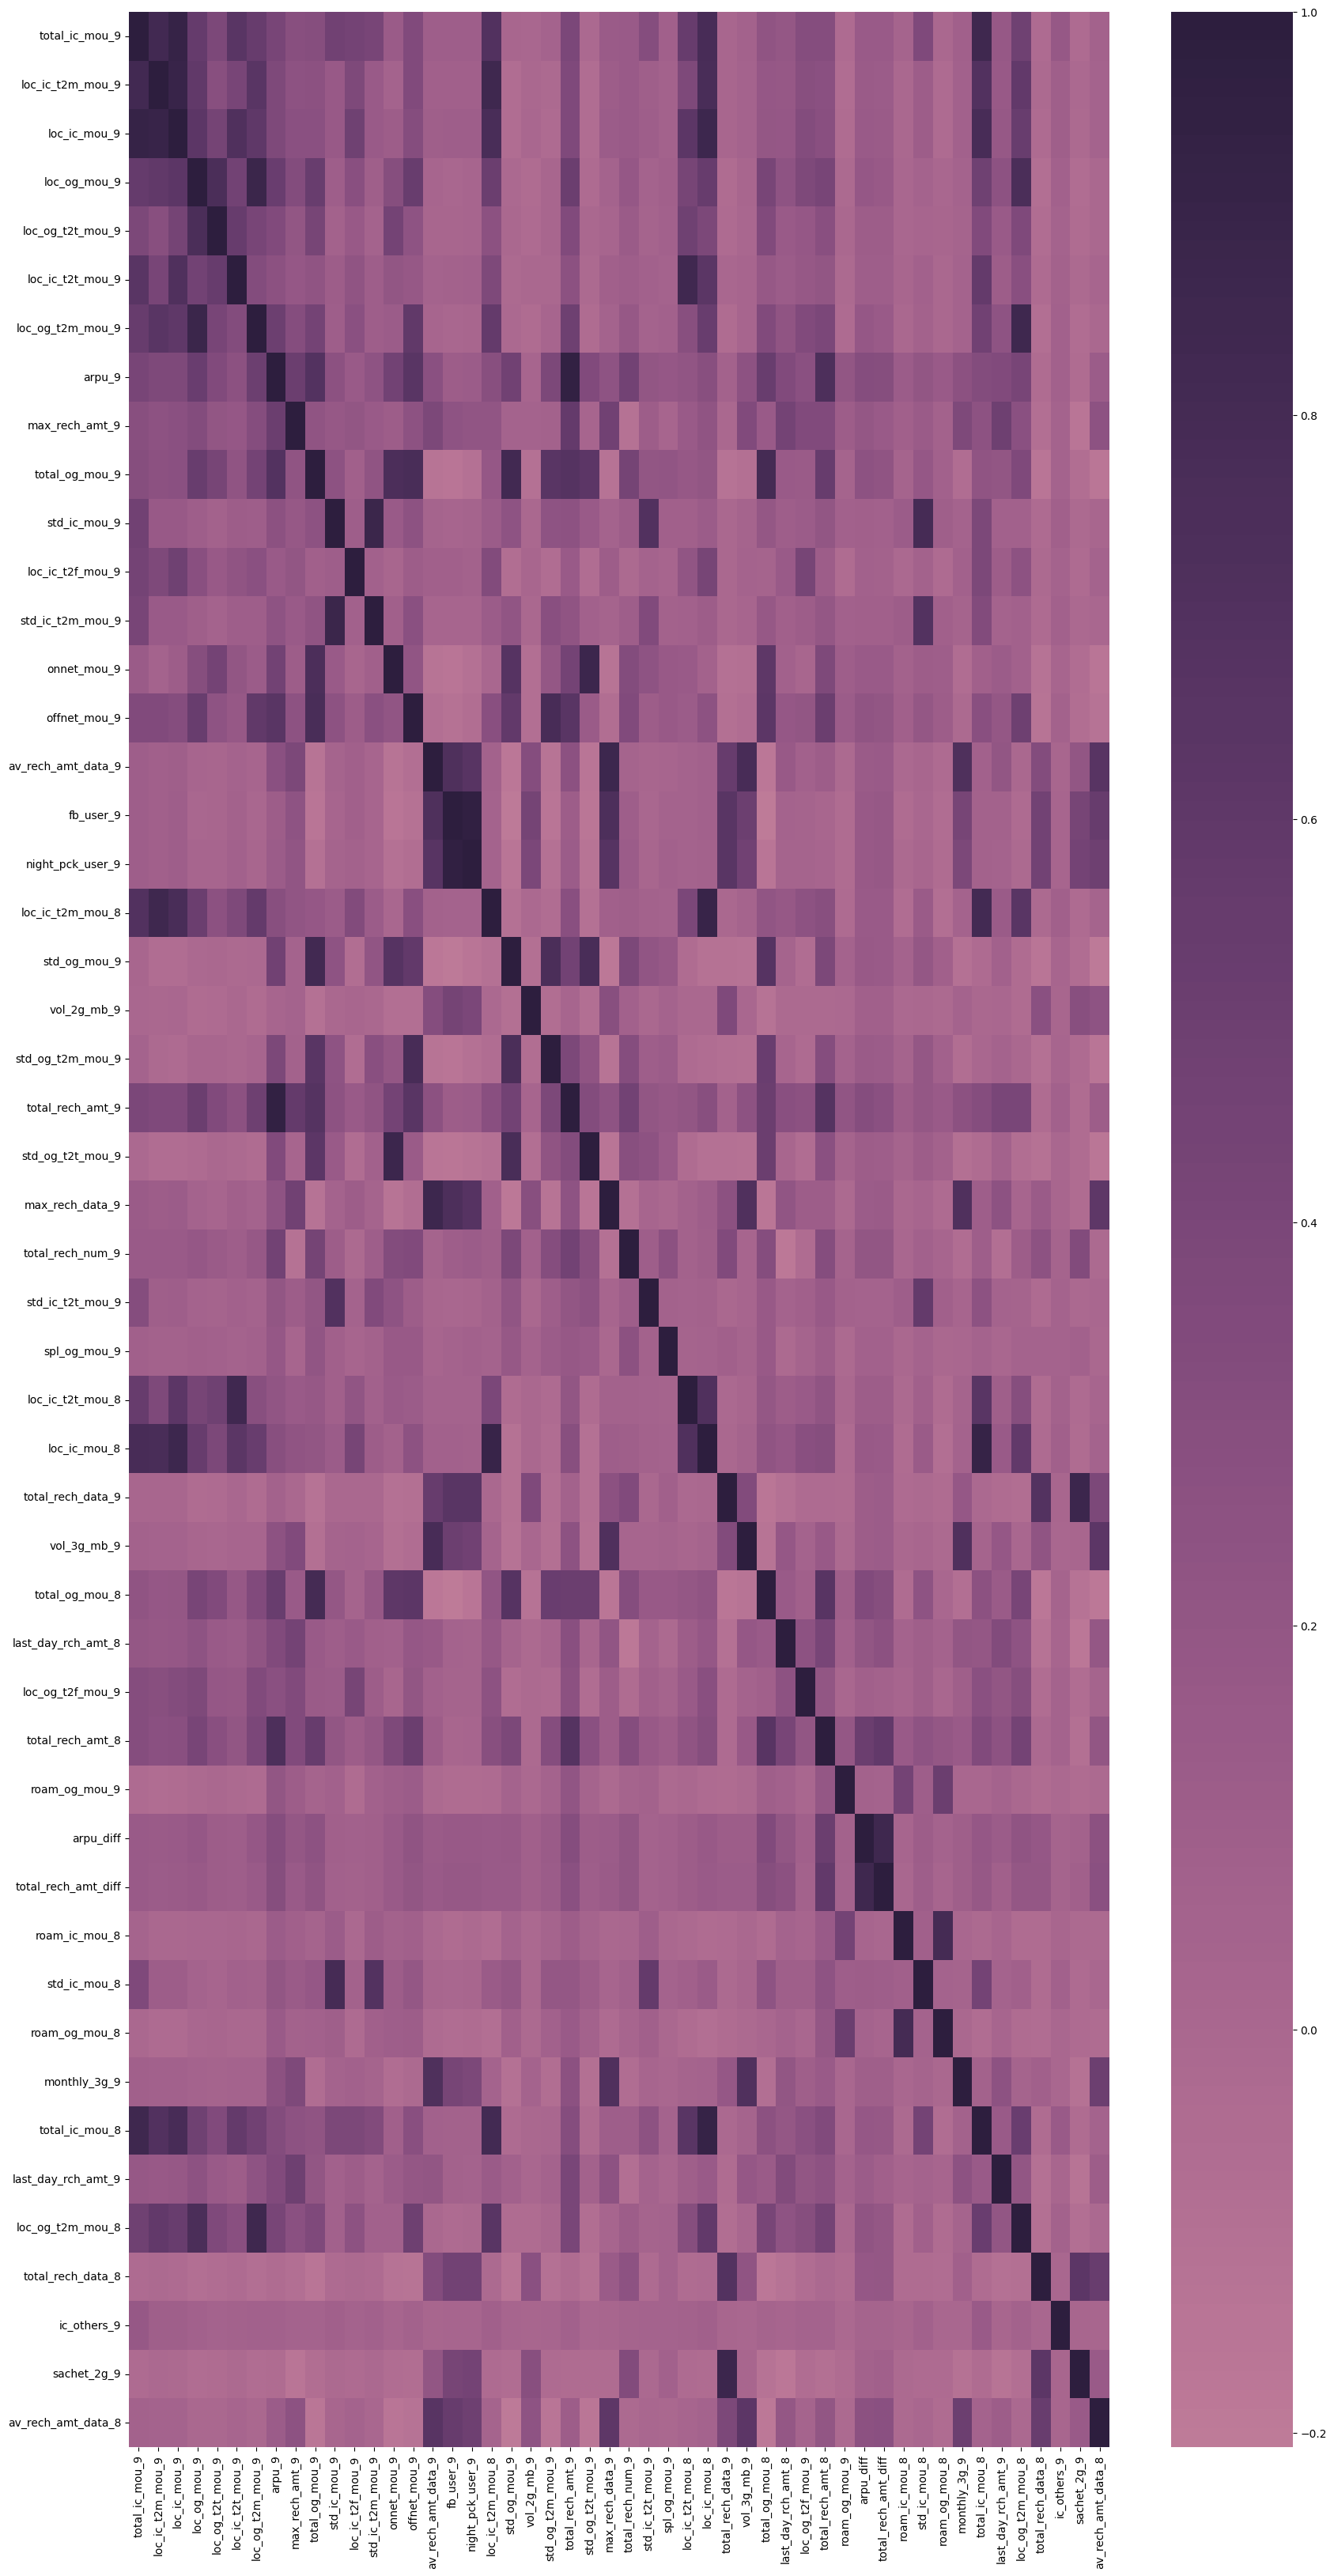

In [109]:
plt.figure(figsize = (20,40))
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0,cmap= sns.cubehelix_palette(200))
plt.show()

In [110]:
# Selecting features that are relevent
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [111]:
step = [('scaler', StandardScaler()),("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]

# compiling
logistic = Pipeline(step)

# hyperparameter
param = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# 5 folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch
model = GridSearchCV(estimator = logistic, cv = fold, param_grid = param, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [112]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [113]:
# To display the params in GIT Page to avoid rending issue
cv_results_df = pd.DataFrame(model.cv_results_)
cv_results_df = cv_results_df[['param_logistic__C', 'mean_test_score', 'std_test_score', 'rank_test_score']]
cv_results_df.sort_values(by="rank_test_score", inplace=True)
print(cv_results_df.to_markdown(index=False))

|   param_logistic__C |   mean_test_score |   std_test_score |   rank_test_score |
|--------------------:|------------------:|-----------------:|------------------:|
|                10   |          0.873722 |       0.00726693 |                 1 |
|                 5   |          0.873718 |       0.00728152 |                 2 |
|                 4   |          0.87371  |       0.00728091 |                 3 |
|                 3   |          0.873708 |       0.00728356 |                 4 |
|                 2   |          0.87368  |       0.00729981 |                 5 |
|                 1   |          0.873617 |       0.00732941 |                 6 |
|                 0.5 |          0.873476 |       0.00735403 |                 7 |
|                 0.1 |          0.872406 |       0.00754118 |                 8 |
|                 2   |        nan        |     nan          |                 9 |
|                 1   |        nan        |     nan          |                 9 |
|   

In [114]:
model.best_score_

np.float64(0.8737220640594027)

In [115]:
model.best_params_

{'logistic__C': 10, 'logistic__penalty': 'l2'}

In [116]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5795 1086]
 [ 120  488]]
Sensitivity: 	0.8
Specificity: 	0.84
ROC:    	 0.88


In [117]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [118]:
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [119]:
coefficient = logistic_model.coef_.reshape((9, 1)).tolist()
coefficient = [val for sublist in coefficient for val in sublist]
coefficient = [round(coefficient, 3) for coefficient in coefficient]
logistic_feature = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_feature)

In [120]:
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.519571,-1.150798,-0.702449,-1.527341,0.238178,-0.022103,0.213829,0.064128,-0.793145,0.939986


## Conclusions and Recommendations

Our analysis of the telecom churn dataset has revealed several key factors that strongly influence customer attrition. In particular, metrics from the action phase (month 8) were found to be highly predictive of churn. The model identified the following as the primary indicators:

- **Incoming Call Duration (total_ic_mou_8):** Low incoming call minutes during the action phase suggest reduced engagement.
- **Recharge Amount Variations (total_rech_amt_diff):** Significant differences between the recharge amounts in month 8 and the average of months 6 and 7 indicate changes in spending behavior.
- **Outgoing Call Duration (total_og_mou_8):** Reduced outgoing call activity is also associated with a higher likelihood of churn.
- **Average Revenue per User (arpu_8):** Variations in ARPU signal shifts in customer spending patterns.
- **Roaming Usage (roam_ic_mou_8, roam_og_mou_8):** Changes in roaming call minutes can reflect changes in customer movement and engagement.
- **Standard Call Durations (std_ic_mou_8, std_og_mou_8):** These metrics further refine our understanding of call behavior during the critical action phase.
- **Data Recharge Behavior (av_rech_amt_data_8):** A drop in average data recharge amounts highlights a reduction in overall customer engagement with data services.

### Recommendations to Reduce Churn

Based on these insights, the following strategies are recommended:

- **Targeted Incentives:** Offer personalized discounts and special recharge plans for customers showing early signs of disengagement. This can help re-engage users before they churn.
- **Service Enhancements:** Improve data service packages and optimize call tariffs. In regions where network quality is a concern, especially for data services, consider expanding 3G coverage or enhancing 2G service.
- **Proactive Customer Support:** Implement proactive outreach programs to address customer issues early. For example, personalized follow-up calls or feedback sessions may reduce dissatisfaction.
- **Monitor Key Metrics:** Regularly track changes in call durations, recharge behaviors, and ARPU. Early detection of negative trends can prompt timely interventions.

In conclusion, by focusing on these critical indicators and adopting targeted retention strategies, telecom operators can better predict and reduce customer churn, leading to improved customer satisfaction and increased revenue retention.
